In [78]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import rand, randint


In [79]:
def selection(population: list, scores: list, n_rounds: int = 5) -> list:
    """
    Perform torunament selection.
    Args:
        population: (List[List]) list of binary strings 
        scores:     (List[Float]) scores of the strings
        n_rounds:   (int) number of rounds
    Return:
        (list) binary string of the best candidate, i.e. selected parent
    """
    parent_index = randint(0, len(population)) # make first random selection

    # make n_rounds random selections from the population to perform tournament
    for index in randint(0, len(population), n_rounds):
        if scores[parent_index] < scores[index]:
            parent_index = index
    return population[parent_index]

def crossover(parent1: str, parent2: str, r_cross: float = 0.8) -> tuple:
    """
    Perform crossover between two parents.
    Args:
        parent1: (list) binary string of parent
        parent2: (list) binary string of parent
        r_cross: (float) in [0, 1] crossover rate, i.e. probability of crossover
    Return:
        (list, list) childs binary strings
    """
    child1 = parent1[:]
    child2 = parent2[:]

    # does crossover occur
    if rand() < r_cross:
        # make split point for crossover which lay out of edges 
        split_point = randint(1, len(parent1) - 2)
        child1 = parent1[: split_point] + parent2[split_point :]
        child2 = parent1[: split_point] + parent2[split_point :]
    return child1, child2

def mutation(child: list, r_mut: float = 0.05):
    """
    Perform muntation, i.e. random bit flip.
    Args:
        child: (list) binary string 
        r_mut: (float) mutation rate
    """
    #print("MUTATION!")
    for i in range(len(child)):
        if rand() < r_mut:
            child[i] = 1 - child[i]

def gen_opt(objective, 
            population: list, 
            n_iter: int,
            r_cross: float,  
            r_mut: float,
            n_rounds: int
            ): 
    """
    Perform genetic optimiaztion of the objective function on the given initial population of binary strings.
    Args:
        objective: (Callable[String] -> Float) generic objective function of binary string 
        population: (List[String]) list of binary strings in the initial population 
        n_iter: (int) number of iterations 
        r_cross: (float) in [0, 1] probability of the crossover
        r_mut: (float) in [0, 1] mutation rate
        n_rounds: (int) number of rounds during tournament selection   
    """
    best_score = 0
    best_string = None
    history = {'scores': [], 'bitstrings': []}

    for iter in range(n_iter):
        n_pop = len(population)
        selected, childs = [], []
        scores = [objective(ind) for ind in population]

        for i in range(n_pop):
            if scores[i] > best_score: 
                best_score = scores[i]
                best_string = population[i]
        
        # print(f'iter {iter}: best score: {best_score}: {best_string}')
        history.get('scores').append(best_score)
        history.get('bitstrings').append(best_string)
        
        for i in range(n_pop):
            selected.append(selection(population, scores, n_rounds))
        
        for j in range(0, n_pop, 2):
            tp1, tp2 = selected[j], selected[j + 1]
            # crossover
            tc1, tc2 = crossover(tp1, tp2, r_cross)
            # mutation
            mutation(tc1, r_mut)
            mutation(tc2, r_mut)

            childs.append(tc1)
            childs.append(tc2)
        
        population = childs

    return history



In [83]:
def onemax(bitstr): return sum(bitstr)

pop_size, n_bits = 20, 100
n_iter = 300
r_cross = 0.9
r_mut = 0.01
r_muts = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
n_rounds = 3

init_pop = [randint(0, 2, n_bits).tolist() for _ in range(pop_size)]


In [84]:
history = gen_opt(onemax, init_pop, n_iter, r_cross, r_mut, n_rounds)

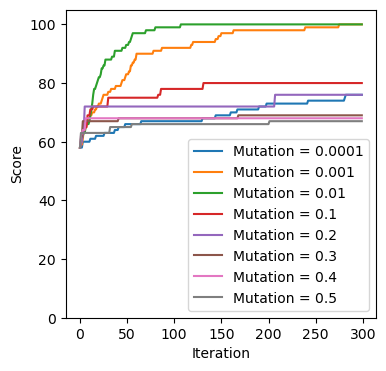

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for tr_mut in r_muts: 
    history = gen_opt(onemax, init_pop, n_iter, r_cross, tr_mut, n_rounds)
    ax.plot(history.get('scores'), label=f"Mutation = {tr_mut}")
ax.set_xlabel('Iteration')
ax.set_ylabel('Score')
ax.set_ylim([0, n_bits + 5])
ax.legend()
plt.show()